# exploring the allyhood dataset over time through executed workflows

1. find the workflows we want to extract artifacts from
2. pull the artifact location for each run
3. aggregate all taht stuff after unzipping.

In [1]:
from pandas import *
import requests, os, pandas, zipfile, io, bs4
from toolz.curried import *
__import__("requests_cache").install_cache()
__import__("dotenv").load_dotenv()
Soup = partial(bs4.BeautifulSoup, features="html.parser")
GH = "https://api.github.com/"
requests_get = partial(requests.get, headers=dict(Authorization=F"token {os.environ['GITHUB_TOKEN']}"))

load the last completed actions from the research repository

In [2]:
(
    df := DataFrame(
        (runs := requests_get(
            GH + "repos/a11yhood/research/actions/runs", params=dict(status="completed", branch="main")
        )).json())
    .workflow_runs
    .apply(Series)
    .set_index("id")
)
(df := df.assign(**df[df.columns[df.columns.str.endswith("_at")]].apply(to_datetime))).T

id,14746132833,14722767993,14699701508,14687990894,14677257269,14656363171,14632838629,14609355491,14601502333,14601313404,...,14436877504,14426036963,14415726163,14394955192,14371673795,14365609516,14365544869,14365496064,14365467344,14365141862
name,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,...,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper
node_id,WFR_kwLONqVN4c8AAAADbvAhYQ,WFR_kwLONqVN4c8AAAADbYuceQ,WFR_kwLONqVN4c8AAAADbCulBA,WFR_kwLONqVN4c8AAAADa3j0bg,WFR_kwLONqVN4c8AAAADatUsNQ,WFR_kwLONqVN4c8AAAADaZZaow,WFR_kwLONqVN4c8AAAADaC9l5Q,WFR_kwLONqVN4c8AAAADZskS4w,WFR_kwLONqVN4c8AAAADZlE-fQ,WFR_kwLONqVN4c8AAAADZk5cfA,...,WFR_kwLONqVN4c8AAAADXIFEwA,WFR_kwLONqVN4c8AAAADW9va4w,WFR_kwLONqVN4c8AAAADWz6GUw,WFR_kwLONqVN4c8AAAADWgGVuA,WFR_kwLONqVN4c8AAAADWJ5Www,WFR_kwLONqVN4c8AAAADWEHOLA,WFR_kwLONqVN4c8AAAADWEDRpQ,WFR_kwLONqVN4c8AAAADWEATAA,WFR_kwLONqVN4c8AAAADWD-i0A,WFR_kwLONqVN4c8AAAADWDqrZg
head_branch,main,main,main,main,main,main,main,main,main,main,...,main,main,main,main,main,main,main,main,main,main
head_sha,3ed23d4ef920eb6630eb026693b8033550aeb6e9,3ed23d4ef920eb6630eb026693b8033550aeb6e9,3ed23d4ef920eb6630eb026693b8033550aeb6e9,3ed23d4ef920eb6630eb026693b8033550aeb6e9,3ed23d4ef920eb6630eb026693b8033550aeb6e9,3ed23d4ef920eb6630eb026693b8033550aeb6e9,3ed23d4ef920eb6630eb026693b8033550aeb6e9,3ed23d4ef920eb6630eb026693b8033550aeb6e9,3ed23d4ef920eb6630eb026693b8033550aeb6e9,1d0d4c9c8f9cd71b477ebefa9a4063ae88f2e26b,...,5970953cf776c69370238dee9af780ff30ff4dd2,5970953cf776c69370238dee9af780ff30ff4dd2,5970953cf776c69370238dee9af780ff30ff4dd2,5970953cf776c69370238dee9af780ff30ff4dd2,5970953cf776c69370238dee9af780ff30ff4dd2,5970953cf776c69370238dee9af780ff30ff4dd2,578aa6fcbb56d5e06780804c902af5cb549dea69,5d2ee559087c9d5c6d9194c2ca823f92c2e766ad,c5bb4b7e13e7f07476acc7105656d20e4d2a63b4,31fbc6b442eef0d4844e97085447787c75a930b3
path,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,...,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml,.github/workflows/scrape.yml
display_title,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,...,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper,ATscraper
run_number,135,134,133,132,131,130,129,128,127,126,...,115,114,113,112,111,110,109,108,107,106
event,schedule,schedule,schedule,schedule,schedule,schedule,schedule,schedule,push,push,...,schedule,schedule,schedule,schedule,schedule,push,push,push,push,push
status,completed,completed,completed,completed,completed,completed,completed,completed,completed,completed,...,completed,completed,completed,completed,completed,completed,completed,completed,completed,completed
conclusion,success,success,success,success,success,success,success,failure,success,success,...,success,success,success,success,success,success,cancelled,cancelled,failure,success


explode all the information we have about the artifacts collected

In [3]:
(
    artifacts := df
    .artifacts_url
    .apply(requests.get)
    .apply(operator.methodcaller("json"))
    .apply(Series)
    .artifacts
    .explode()
    .dropna()
    .apply(Series)
)

,id,node_id,name,size_in_bytes,url,archive_download_url,expired,digest,created_at,updated_at,expires_at,workflow_run
id,,,,,,,,,,,,
14746132833,3034797545,MDg6QXJ0aWZhY3QzMDM0Nzk3NTQ1,previous-135,140,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:e5d85355b7a1fe939fb1f94e1c6c1e638416b3f...,2025-04-30T03:34:25Z,2025-04-30T03:34:25Z,2025-07-29T03:34:16Z,"{'id': 14746132833, 'repository_id': 916803041..."
14746132833,3034799154,MDg6QXJ0aWZhY3QzMDM0Nzk5MTU0,data-ravelry,1479418,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:4d6da2f3418a397e399c7007565368caf4c8702...,2025-04-30T03:34:52Z,2025-04-30T03:34:52Z,2025-07-29T03:34:16Z,"{'id': 14746132833, 'repository_id': 916803041..."
14746132833,3034799211,MDg6QXJ0aWZhY3QzMDM0Nzk5MjEx,scrape-ravelry-135,72267,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:68211b58563aa631c3893533b5cb672677ead6b...,2025-04-30T03:34:53Z,2025-04-30T03:34:53Z,2025-07-29T03:34:16Z,"{'id': 14746132833, 'repository_id': 916803041..."
14746132833,3034800494,MDg6QXJ0aWZhY3QzMDM0ODAwNDk0,data-github,339346,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:1bba3d5c06791bfaeacd1475a79496723d9a9bd...,2025-04-30T03:35:15Z,2025-04-30T03:35:15Z,2025-07-29T03:34:16Z,"{'id': 14746132833, 'repository_id': 916803041..."
14746132833,3034800558,MDg6QXJ0aWZhY3QzMDM0ODAwNTU4,scrape-github-135,98611,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:d0db2e9346715195c123ac7d7c89e5168085f88...,2025-04-30T03:35:16Z,2025-04-30T03:35:16Z,2025-07-29T03:34:16Z,"{'id': 14746132833, 'repository_id': 916803041..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14365141862,2914109299,MDg6QXJ0aWZhY3QyOTE0MTA5Mjk5,scrape-ravelry-106,71590,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:90b2ac7c81704dcd81189057e9cc625c13dd497...,2025-04-09T19:13:40Z,2025-04-09T19:13:40Z,2025-07-08T19:12:39Z,"{'id': 14365141862, 'repository_id': 916803041..."
14365141862,2914164597,MDg6QXJ0aWZhY3QyOTE0MTY0NTk3,data-thingiverse,2480957,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:ff2a7b423c80ae73327b06463c87338f35bedd5...,2025-04-09T19:22:37Z,2025-04-09T19:22:37Z,2025-07-08T19:12:39Z,"{'id': 14365141862, 'repository_id': 916803041..."
14365141862,2914164726,MDg6QXJ0aWZhY3QyOTE0MTY0NzI2,scrape-thingiverse-106,80174,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:85fb507936e6cf59d7864c3b3b07327973b97a8...,2025-04-09T19:22:38Z,2025-04-09T19:22:38Z,2025-07-08T19:12:39Z,"{'id': 14365141862, 'repository_id': 916803041..."


just download all the `report-aggregate` artifacts

In [4]:
aggregates = artifacts[artifacts.name.str.startswith("report-aggregate")]
results = aggregates.archive_download_url.apply(requests_get)

extract the contents of the artifact zip archives

In [5]:
from pathlib import Path
import pandas, zipfile, io
for k, result in results.items():
    pipe(result.content, io.BytesIO, zipfile.ZipFile, operator.methodcaller("extractall", F"past/{k}"))

load the contents of archives into a dataframe

In [6]:
datasets = Index(Path("past").rglob("at.json.gz")).to_series().apply(read_json)
datasets = datasets.to_frame("data").reset_index()
datasets.index = datasets["index"].apply(compose_left(operator.attrgetter("parts"), get(1), int)).values
datasets["time"] = df.created_at

count the entries for each run

<Axes: xlabel='created_at'>

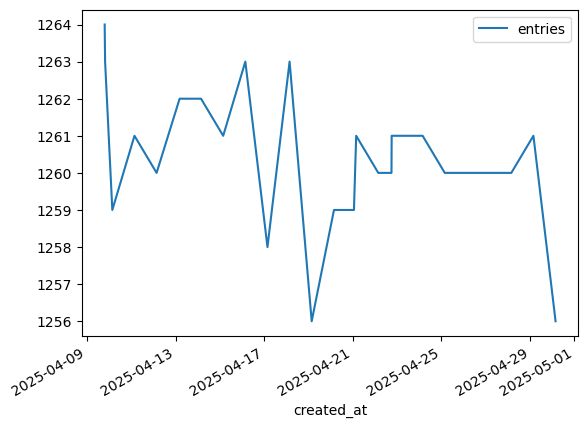

In [7]:
entries = datasets["data"].apply(
    lambda x: x.reindex(x.index.unique()).shape
).apply(compose_left(list, first)).rename("entries")

df[["created_at"]].join(entries.to_frame()).dropna().sort_values("created_at").set_index("created_at").plot()